In [70]:
#Load all the required libraries
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
#from sklearn.model_selection import train_test_split


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [73]:
#Load the  data into python environment
day = pd.read_csv("day.csv",encoding="latin1")
mising_value = pd.DataFrame(day.isnull().sum())
mising_value = mising_value.reset_index()

In [74]:
#Rename variable
mising_value = mising_value.rename(columns = {'index': 'Variable', 0: 'Missing_percentage'})
#Calculate percentage of missing value : NO MISSING VALUES 
mising_value['Missing_percentage'] = (mising_value['Missing_percentage']/len(day))*100

In [75]:
# create a copy of the variable
df = day.copy()

In [76]:
%matplotlib inline 

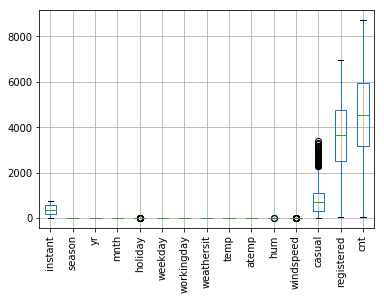

In [77]:
# Use poxplot to find the outliers
boxplot = df.boxplot(grid=True, rot=90, fontsize=10)  


{'whiskers': [<matplotlib.lines.Line2D at 0xf2ee588>,
 'caps': [<matplotlib.lines.Line2D at 0xf2eec18>,
 'boxes': [<matplotlib.lines.Line2D at 0xf2ee198>],
 'medians': [<matplotlib.lines.Line2D at 0xf2f82e8>],
 'fliers': [<matplotlib.lines.Line2D at 0xf2f8630>],
 'means': []}

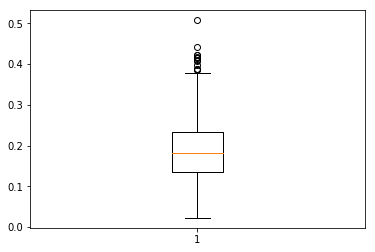

In [78]:
plt.boxplot(day['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0xf340d68>,
 'caps': [<matplotlib.lines.Line2D at 0xf34b438>,
 'boxes': [<matplotlib.lines.Line2D at 0xf340978>],
 'medians': [<matplotlib.lines.Line2D at 0xf34bac8>],
 'fliers': [<matplotlib.lines.Line2D at 0xf34be10>],
 'means': []}

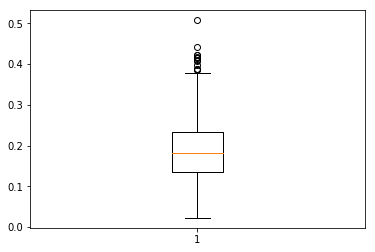

In [79]:
plt.boxplot(day['windspeed'])

In [80]:
#save only numeric values from the dataset
col_names=["instant","season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]

In [81]:
# Calculate interquartile range to determine outliers
for i in col_names:
     #print(i)
    q75, q25 = np.percentile(day.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)# calculate lower fence
    maximum = q75 + (iqr*1.5)# calculate upper fence
    print(minimum)
    print(maximum)
    
    day = day.drop(day[day.loc[:,i] < minimum].index)
    day = day.drop(day[day.loc[:,i] > maximum].index)

-364.0
1096.0
0.5
4.5
-1.5
2.5
-5.0
19.0
0.0
0.0
-5.0
11.0
-1.5
2.5
-0.5
3.5
-0.12802012499999998
1.1244788749999999
-0.06603762500000004
1.012377375
0.20296900000000023
1.0467189999999997
-0.013955624999999972
0.381501375
-852.5
2265.5
-839.25
8082.75
-654.0
9434.0


In [82]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08-01-2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [83]:
#Detect and replace with NA
# #Extract quartiles
q75_1, q25_1 = np.percentile(day['hum'], [75 ,25])
q75_2, q25_2 = np.percentile(day['windspeed'], [75 ,25])
q75_3, q25_3 = np.percentile(day['casual'], [75 ,25])
# #Calculate IQR
iqr_1 = q75_1 - q25_1
iqr_2 = q75_2 - q25_2
iqr_3 = q75_3 - q25_3

# #Calculate inner and outer fence
minimum_1 = q25_1 - (iqr_1*1.5)
maximum_1 = q75_1 + (iqr_1*1.5)

minimum_2 = q25_2 - (iqr_2*1.5)
maximum_2 = q75_2 + (iqr_2*1.5)

minimum_3 = q25_3 - (iqr_3*1.5)
maximum_3 = q75_3 + (iqr_3*1.5)

# #Replace with NA
day.loc[day['hum'] < minimum,:'hum'] = np.nan
day.loc[day['windspeed'] < minimum,:'windspeed'] = np.nan
day.loc[day['casual'] > maximum,:'casual'] = np.nan

# #Calculate missing value
missing_val = pd.DataFrame(day.isnull().sum())

#Impute the missing valuse by mean
day['hum'] = day['hum'].fillna(day['hum'].mean())
day['windspeed'] = day['windspeed'].fillna(day['windspeed'].mean())
day['casual'] = day['casual'].fillna(day['casual'].mean())

In [84]:
##Correlation analysis
#Correlation plot
df_corr = day.loc[:,col_names]

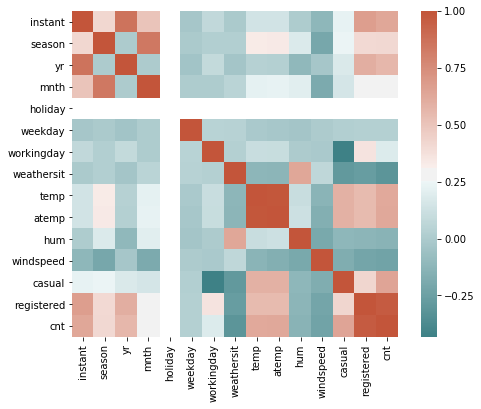

In [85]:
#Set the width and hieght of the plot
fun, ax = plt.subplots(figsize=(8, 6))

#Generate correlation matrix
cor_mat = df_corr.corr()

#Plot using seaborn library
sns.heatmap(cor_mat, mask=np.zeros_like(cor_mat, dtype=np.bool), cmap=sns.diverging_palette(200, 20, as_cmap=True),
            square=True, ax=ax)

In [86]:
#Feature Scaling

df = day.copy()
day = df.copy()
df = day.drop(['instant','casual','registered','dteday','holiday','temp'], axis=1)

In [87]:
col_names=["season","yr","mnth","holiday","weekday","workingday","weathersit","atemp","cnt"]

In [88]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [89]:
#train, test = train_test_split(df, test_size=0.2)
training,testing=train_test_split(df, test_size=0.2)

#Decision tree for regression
DTree = DecisionTreeRegressor(max_depth=2).fit(training.iloc[:,0:9], training.iloc[:,9])

#Apply model on test data
p_DTree = DTree.predict(testing.iloc[:,0:9])

#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
MAPE(testing.iloc[:,9], p_DTree)

26.66292273997367

In [90]:
import statsmodels.api as sm
#Train the model using the training sets
model = sm.OLS(training.iloc[:,9], training.iloc[:,0:9]).fit()

In [91]:
#Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1788.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:12:05   Log-Likelihood:                -4266.9
No. Observations:                 524   AIC:                             8552.
Df Residuals:                     515   BIC:                             8590.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       515.2106     59.827      8.612      0.000     397.676     632.745
yr          2046.0194     73.102     27.989      0.000    1902.405    2189.634
mnth         -26.0585     18.637     -1.398      0.163     -62.673      10.556
weekday       91.3165     18.516      4.932      0.000      54.940     127.693
workingday   457.5854     85.971      5.323      0.000     288.688     626.482
weathersit  -726.5365     91.785     -7.916      0.000    -906.856    -546.217
atemp       5741.6743    240.687     23.855      0.000    5268.825    6214.524
hum          151.0698    301.652      0.501      0.617    -441.550     743.690
windspeed   -669.7632    442.236     -1.514      0.131   -1538.572     199.046
==============================================================================
Omnibus:                      104.800   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.242
Skew:                          -0.983   Prob(JB):                     8.49e-62
Kurtosis:                       6.003   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
final = sm.OLS(training.iloc[:,9], training.iloc[:,0:9]).fit()

# Print out the statistics
final.summary()
# make the predictions by the model
#predictions_LR = final.predict(testing.iloc[:,0:9]) 
linear_reg = final.predict(testing.iloc[:,0:9]) 

#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(testing.iloc[:,9], linear_reg)

18.629799924665132